# Mileage Prediction

## import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## import data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

## Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


## Removing Missing values

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


## Data Visualisation

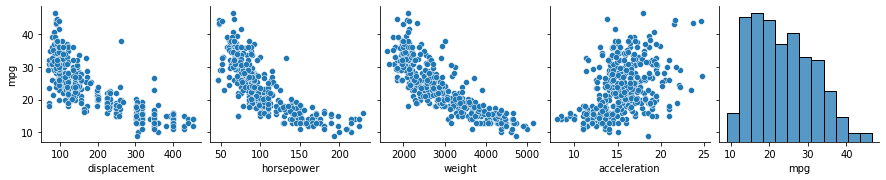

In [10]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg'])

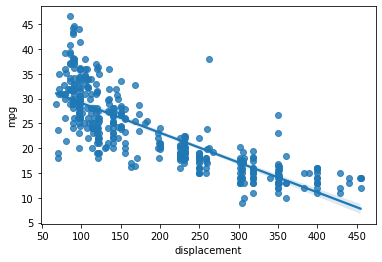

In [11]:
sns.regplot(x='displacement',y='mpg',data=df)

## Define Target Variable y and Feature x

In [12]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [13]:
y = df['mpg']

In [14]:
y.shape

(392,)

In [15]:
x = df[['displacement','horsepower','weight','acceleration']]

In [16]:
x.shape

(392, 4)

## Scaling Data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss = StandardScaler()

In [19]:
x =ss.fit_transform(x)

In [20]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [21]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


## Train Test Split Data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =0.7,random_state=182529)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

## Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(x_train, y_train)

LinearRegression()

In [28]:
lr.intercept_

23.4873599045264

In [29]:
lr.coef_

array([-0.84562971, -2.01647583, -4.07937113, -0.65503741])

**Mileage = 23.6 - 0135 Displacemnt - 1.42 HorsePower - 5.23 Weight - 0224 Acceleration + error**

## Predict Test Data

In [30]:
y_pred = lr.predict(x_test)

In [31]:
y_pred

array([10.42199307,  8.56752019, 25.92281521, 24.05789124, 29.87072507,
       25.91430134, 10.72445176, 26.87359111, 10.26301035, 29.26118193,
       29.70319661, 14.42838885, 27.89891344, 26.22277431, 28.61381406,
       21.25149273, 21.20170392, 31.52398396, 17.5379806 , 23.70721325,
       30.99745351, 30.34687941, 21.30799539, 20.74401397, 22.35126221,
       30.20930575, 24.14829679, 22.45365361, 15.20928576, 21.45201374,
       30.15104328, 17.1397828 , 16.5381457 , 28.81358899, 31.52662382,
       25.1432604 , 27.93264145, 29.24016539, 32.36805092, 18.15299142,
       22.73456242, 26.67930417, 29.13164949, 12.69151255, 16.04529538,
       16.6392218 , 15.76008703, 30.93206143, 31.58532098, 17.11488704,
       15.47167942, 15.76325557, 29.48854432, 30.65082911, 28.95012373,
       25.17963572, 30.06946689, 23.85161252, 16.21576355, 29.3567361 ,
       29.59915996, 31.03734573, 27.14767908, 14.50285557, 20.73627682,
       22.47299448, 29.35180421, 26.25867527, 28.48520368, 29.98

## Model Accuracy

In [32]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error,r2_score

In [33]:
mean_absolute_error(y_test,y_pred)

3.2449851292462393

In [34]:
mean_absolute_percentage_error(y_test,y_pred)

0.14347411511067465

In [35]:
r2_score(y_test,y_pred)

0.7086393908048606

## Polynomial Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
poly = PolynomialFeatures(degree = 2 , interaction_only = True, include_bias = False)

In [38]:
x_train2 = poly.fit_transform(x_train)

In [39]:
x_test2 = poly.fit_transform(x_test)

In [40]:
lr.fit(x_train2, y_train)

LinearRegression()

In [41]:
lr.intercept_

21.389888426073288

In [42]:
lr.coef_

array([-1.88930156, -4.90881101, -2.19656477, -1.33199735,  1.24409734,
        0.96869824,  0.02351037,  0.3725383 , -0.45926564,  1.29217592])

In [43]:
y_pred_poly = lr.predict(x_test2)

## Model Accuracy

In [44]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [45]:
mean_absolute_error(y_test,y_pred_poly)

2.838919303319938

In [46]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.12071190255699395

In [47]:
r2_score(y_test,y_pred_poly)

0.7594029518648376